# **CIFAR 10**
**object recognization**

Anirudh vasudevan

In [6]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np
import keras
import tensorflow.keras as tk

In [7]:
(x_train, y_train ), (x_test, y_test) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [8]:
print(x_train.shape)#by default its 50 to 10
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [9]:
print(x_train[0].shape)

(32, 32, 3)


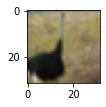

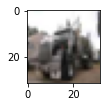

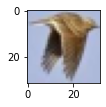

In [10]:

for i in range (121, 124):
    plt.subplot(120 + i)
    img = x_train[i]
    plt.imshow(img)
    plt.show()

In [11]:
x_train = x_train.reshape(x_train.shape[0], 32 , 32 , 3)
x_test = x_test.reshape(x_test.shape[0], 32 , 32 , 3)
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

x_train /= 255 #normalization 
x_test /= 255
n_classes = 10

print("shape before one-hot encoding: ", y_train.shape) #single high bit and other are low
y_train = np_utils.to_categorical(y_train , n_classes)
y_test = np_utils.to_categorical(y_test , n_classes)
print("shape after one-hot encoding: ", y_train.shape)

shape before one-hot encoding:  (50000, 1)
shape after one-hot encoding:  (50000, 10)


In [12]:
from keras.layers.pooling import MaxPool2D
from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from keras.layers import Dense , Dropout , Conv2D, MaxPool2D ,Flatten

model = Sequential()
model.add(Conv2D(50 ,kernel_size=(3,3), strides =(1,1), padding ="same", activation = "relu", input_shape= (32,32,3)))

model.add(Conv2D(75 ,kernel_size=(3,3), strides =(1,1), padding ="same", activation = "relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125 ,kernel_size=(3,3), strides =(1,1), padding ="same", activation= "relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
#hidden layer
model.add(Dense(500, activation= "relu"))
model.add(Dropout(0.4))
model.add(Dense(250, activation = "relu"))
model.add(Dropout(0.3))

#output layer
model.add(Dense(10,activation = "softmax"))

#compiling
model.compile(loss= "categorical_crossentropy" , metrics= ["accuracy"], optimizer= "adam")

#training 
model.fit(x_train , y_train , batch_size = 128 , epochs = 10 , validation_data = (x_test , y_test))

Epoch 1/10
391/391 [==============================] - 32s 56ms/step - loss: 1.6310 - accuracy: 0.3994 - val_loss: 1.2144 - val_accuracy: 0.5672
Epoch 2/10
391/391 [==============================] - 19s 48ms/step - loss: 1.1466 - accuracy: 0.5901 - val_loss: 0.9283 - val_accuracy: 0.6760
Epoch 3/10
391/391 [==============================] - 19s 48ms/step - loss: 0.9410 - accuracy: 0.6731 - val_loss: 0.8171 - val_accuracy: 0.7157
Epoch 4/10
391/391 [==============================] - 19s 48ms/step - loss: 0.8181 - accuracy: 0.7133 - val_loss: 0.7793 - val_accuracy: 0.7274
Epoch 5/10
391/391 [==============================] - 19s 48ms/step - loss: 0.7354 - accuracy: 0.7447 - val_loss: 0.7205 - val_accuracy: 0.7502
Epoch 6/10
391/391 [==============================] - 19s 47ms/step - loss: 0.6691 - accuracy: 0.7644 - val_loss: 0.6906 - val_accuracy: 0.7607
Epoch 7/10
391/391 [==============================] - 19s 48ms/step - loss: 0.6069 - accuracy: 0.7875 - val_loss: 0.6663 - val_accuracy:

In [13]:
classes = range(0, 10)
names= ["airplane", "automobile", "bird", "cat", "deer","dog","frog","horse","ship","truck"]

#zip the names and classes to make a dict of class_labels
class_labels = dict(zip(classes , names))

batch= x_test[100:109]
labels = np.argmax(y_test[100:109] , axis= -1)

predictions = model.predict(batch, verbose = 1)

1/1 [==============================] - 0s 211ms/step


In [14]:
print(predictions)

[[2.60285538e-04 2.76274204e-05 2.42109317e-02 2.58164834e-02
  4.82154906e-01 1.04949065e-01 1.61240320e-03 3.60715032e-01
  1.07414293e-04 1.45878352e-04]
 [9.84126818e-04 2.63007678e-04 2.76688725e-01 1.20684698e-01
  4.14404757e-02 3.31192642e-01 4.04142849e-02 1.85804397e-01
  7.37393275e-04 1.79024716e-03]
 [5.10703899e-07 1.62316860e-06 8.92187061e-04 2.94630998e-03
  1.41833807e-04 9.37283272e-04 9.95067000e-01 8.87738679e-06
  1.83029010e-06 2.55313535e-06]
 [5.66653262e-06 1.48043819e-06 5.85720700e-04 9.76232886e-01
  2.36417609e-03 8.90971906e-03 1.17034828e-02 1.04033075e-04
  2.48879642e-05 6.80012818e-05]
 [1.08897254e-07 9.98357832e-01 5.96727800e-13 9.69157697e-13
  8.88941563e-14 2.55347176e-13 3.53016011e-12 5.90410221e-14
  1.54885765e-06 1.64043403e-03]
 [3.47024667e-08 9.99431193e-01 7.52869850e-11 3.24284433e-10
  8.10623270e-12 8.14549539e-11 7.55891136e-08 6.23844509e-13
  5.12504948e-06 5.63479785e-04]
 [6.51126504e-02 7.65735400e-04 2.58540064e-01 2.18786314e

In [15]:
for image in predictions:
  print(np.sum(image))
  

1.0
1.0
1.0
1.0000001
0.99999994
0.99999994
1.0
1.0
1.0


In [17]:
class_results = np.argmax(predictions, axis = -1)
print(class_results)

[4 5 6 3 1 1 6 6 8]


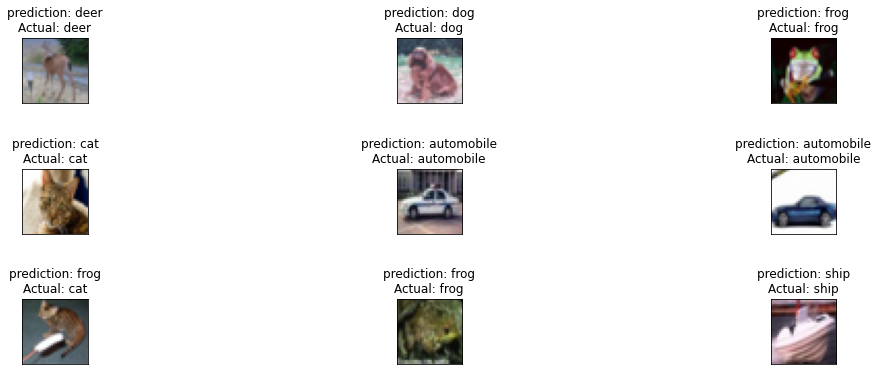

In [18]:
fig, axs = plt.subplots(3, 3 , figsize = (19,6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i , img in enumerate(batch):
  for key , value in class_labels.items():
    if( class_results [i] == key) :
        title = "prediction: {}\nActual: {}".format(class_labels[key], class_labels[labels[i]])
        axs[i].set_title(title)
        axs[i].axes.get_xaxis().set_visible(False)
        axs[i].axes.get_yaxis().set_visible(False)

  axs[i].imshow(img)

plt.show()